### 🚀 Gradient Boosting from Scratch
We will build a simple Gradient Boosted Regressor. Our "Weak Learner" will be a Decision Stump (a tree with only 1 split).

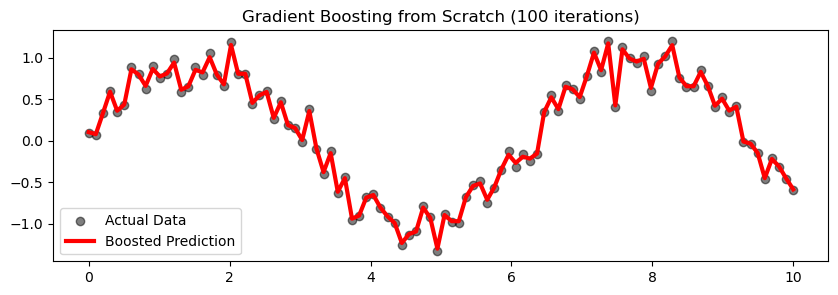

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create Synthetic Non-Linear Data
np.random.seed(42)
X = np.linspace(0,10,100).reshape(-1,1)
y = np.sin(X).ravel() + np.random.normal(0,0.2,100)

class SimpleGradientBooster:
    def __init__(self,n_estimator=50,learning_rate=0.1,max_depth=1):
        self.n_estimator = n_estimator
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None
        
    def fit(self,X,y):
        # Initial Prediction (F0) is just the average of y
        self.initial_prediction = np.mean(y)
        f_m = np.full(y.shape,self.initial_prediction)
        
        for m in range(self.n_estimator):
            # Calculate Residuals (The error of the current estimation)
            # Residual = Actual - Current Prediction
            residuals = y - f_m
            
            # Train a weak learner to predict the Residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X,residuals)
            # Update the overall prediction
            # New Prediction = Old Prediction + (learning rate* Predicted)
            f_m+= self.learning_rate*tree.predict(X)
            # save the tree
            self.trees.append(tree)
            
    def predict(self,X):
        # Start with the initial mean
        y_pred = np.full(X.shape[0],self.initial_prediction)
        # Add the contribution of every tree
        for tree in self.trees:
            y_pred += self.learning_rate*tree.predict(X)
            
        return y_pred
    
# Train the model
model = SimpleGradientBooster(n_estimator=100,learning_rate=0.1,max_depth=5)
model.fit(X,y)
y_pred = model.predict(X)

# Visualization
plt.figure(figsize=(10, 3))
plt.scatter(X, y, color='black', alpha=0.5, label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=3, label="Boosted Prediction")
plt.title(f"Gradient Boosting from Scratch ({len(model.trees)} iterations)")
plt.legend()
plt.show()

📘 The Boosting Logic

1. The Starting Point ($F_0$)

We begin with the simplest possible guess: the average value of all targets.
$$F_0(x) = \text{mean}(y)$$

2. Calculating Residuals ($r$)

The "Residual" is simply what the model got wrong. If the actual value is 10 and our current model predicts 8, the residual is 2.
$$r_i = y_i - F_{m-1}(x_i)$$

3. Learning from Mistakes

We train a new weak learner $h_m(x)$ to predict those residuals. The model is essentially asking: "How can I adjust the current prediction to get closer to the real answer?"

4. The Additive Update

We update our model by adding the new tree's advice, scaled by a Learning Rate ($\eta$). This rate is crucial—it prevents the model from "over-correcting" too quickly and overfitting.

$$F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)$$

📊 Visualization: Seeing the Sequence

To truly understand boosting, you should look at the first few iterations.

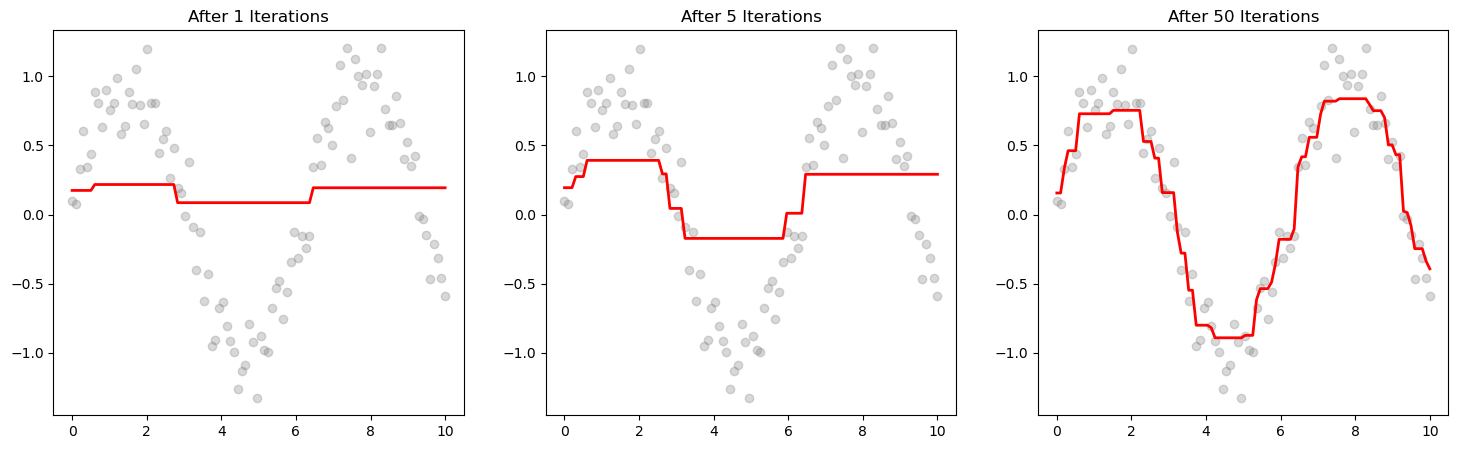

In [9]:
# Visualize the first 3 steps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
steps = [1, 5, 50]

for i, s in enumerate(steps):
    m = SimpleGradientBooster(n_estimator=s, learning_rate=0.1, max_depth=2)
    m.fit(X, y)
    axes[i].scatter(X, y, color='gray', alpha=0.3)
    axes[i].plot(X, m.predict(X), color='red', lw=2)
    axes[i].set_title(f"After {s} Iterations")

plt.show()

##### 🧠 Comparison: Random Forest vs. Boosting

|Feature	| Random  Forest (Bagging)	| Gradient Boosting|
|----|---|---|
|Model Building|	Parallel (Independent trees)|Sequential (Dependent trees)|
|Goal	|Reduce Variance (Overfitting)	|Reduce Bias (Underfitting)|
|Weak Learner	|Complex (Deep Trees)|	Very Simple (Shallow Trees/Stumps)|
|Final Result|	Average of all trees	|Weighted sum of all trees|

### Gradient Boosting: California Housing 

Final Test mse:0.6968
Final Test R2 score:0.4683


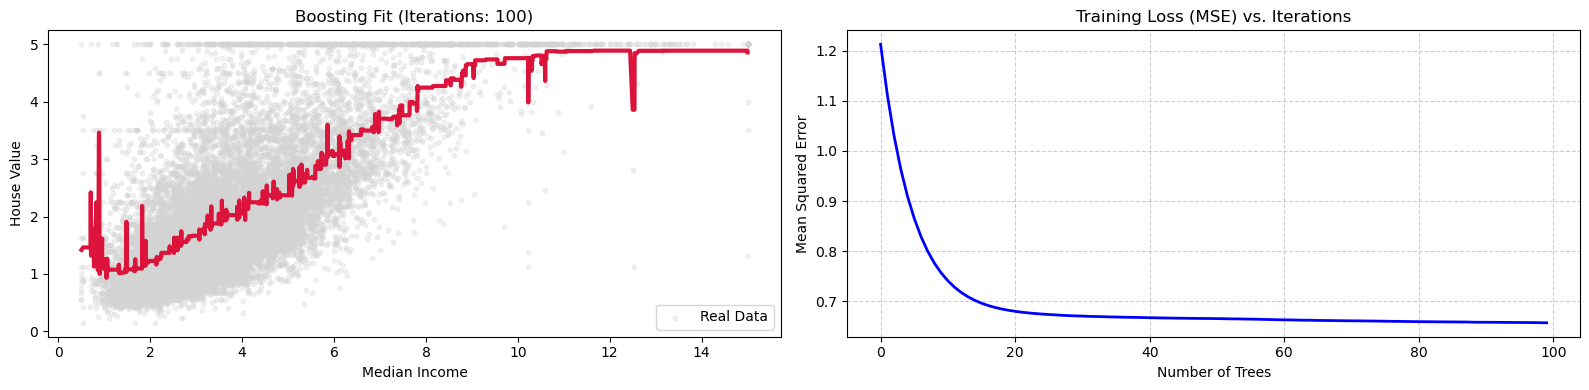

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()
X,y = data.data[:,[0]], data.target # Median Income, House Value
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Sort for better plotting visualization
idx = np.argsort(X_train.ravel())
X_train_sorted = X_train[idx]
y_train_sorted = y_train[idx]

class GradientBoosterScratch:
    def __init__(self,n_estimators=50,lr=0.1,max_depth=2):
        self.n_estimators = n_estimators
        self.lr = lr
        self.max_depth =max_depth
        self.trees = []
        self.inital_pred = None
        self.train_loss = []
        
    def fit(self,X,y):
        self.initial_pred = np.mean(y)
        f_m = np.full(y.shape,self.initial_pred)
        for i in range(self.n_estimators):
            residuals = y - f_m
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X,residuals)
            f_m += self.lr*tree.predict(X)
            
            self.trees.append(tree)
            self.train_loss.append(mean_squared_error(y,f_m))
            
    def predict(self, X):
        y_pred = np.full(X.shape[0],self.initial_pred)
        for tree in self.trees:
            y_pred += self.lr*tree.predict(X)
        return y_pred
# Training the model
n_trees = 100
model = GradientBoosterScratch(n_estimators=n_trees, lr =0.1,max_depth=3)
model.fit(X_train_sorted,y_train_sorted)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)

print(f"Final Test mse:{mse:.4f}")
print(f"Final Test R2 score:{r2:.4f}")

fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].scatter(X_train_sorted,y_train_sorted,color='lightgray',s=10,label="Real Data",alpha=0.3)
ax[0].plot(X_train_sorted,model.predict(X_train_sorted),color='crimson',lw=3)
ax[0].set_title(f"Boosting Fit (Iterations: {n_trees})")
ax[0].set_xlabel("Median Income")
ax[0].set_ylabel("House Value")
ax[0].legend()

#  Visualization B: Loss Reduction (The Learning Curve)
ax[1].plot(range(n_trees),model.train_loss,color='blue',lw=2)
ax[1].set_title("Training Loss (MSE) vs. Iterations")
ax[1].set_xlabel("Number of Trees")
ax[1].set_ylabel("Mean Squared Error")
ax[1].grid(True, linestyle='--',alpha=0.6)

plt.tight_layout()
plt.show()

📘 Why it looks like a "Staircase"

You might notice that the red line in the first plot isn't a smooth curve—it looks like thousands of tiny steps.

- Weak Learners: A DecisionTreeRegressor splits data into boxes (steps).
- Additive Nature: When you add 100 "step-like" models together, they begin to approximate a complex, non-linear curve.
- Residuals: The first tree captures the big trend. The 50th tree captures a tiny "wiggle" in the data that the first 49 trees missed.

📊 Understanding the Loss Curve

In the second plot, the MSE (Mean Squared Error) drops sharply at the beginning and then levels off.
- The Sharp Drop: The first few trees are doing the "heavy lifting" by identifying the most obvious patterns.
- The Plateau: Later trees are refining tiny details. If you add too many trees (e.g., 5,000), this curve might eventually start going back up for the test set, which is a sign of Overfitting.

🧠 Important Hyperparameters to Practice

If we want to play with the code, try changing these three variables:

- learning_rate (lr): If you set this to 1.0, the model learns very fast but becomes "jumpy" and unstable. If you set it to 0.01, you will need many more trees to get a good fit.
- max_depth: If you increase this to 10, each "weak learner" becomes too strong, and the model will start to memorize individual data points (overfitting).
- n_estimators: This is simply how many trees you are willing to build

### 🚀 Gradient Boosting with Feature Importance

In a Gradient Boosting model, Feature Importance tells us which variables were most useful in reducing the error (Residuals) across all the trees in the ensemble.

Since each "weak learner" is a Decision Tree, we calculate importance by looking at how much each feature decreased the Mean Squared Error (MSE) every time it was used to split a node. We then average these values across all 100+ trees.

To make this meaningful, we will now use all 8 features of the California Housing dataset instead of just one.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

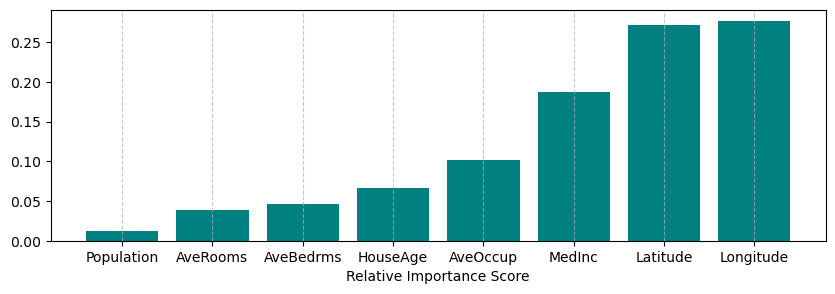

Top Predictor: Longitude


In [53]:
data = fetch_california_housing()
X,y = data.data, data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

class GradientBoosterWithImportance:
    def __init__(self,n_estimators=100,lr=0.1,max_depth=3):
        self.n_estimators = n_estimators
        self.lr = lr
        self.max_depth = max_depth
        self.trees = []
        self.initial_pred = None
        self.feature_importances_ = None
        
    def fit(self,X,y):
        self.initial_pred = np.mean(y)
        f_m = np.full(y.shape,self.initial_pred)
        
        # To store aggregated importance from all trees
        all_importances = np.zeros(X.shape[1])
        
        for _ in range(self.n_estimators):
            residuals = y -f_m
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X,residuals)
            
            # Update predictions 
            f_m += self.lr* tree.predict(X)
            self.trees.append(tree)
            # Accumulate feature importance from this tree
            all_importances += tree.feature_importances_
            
        # Avarage the importance across all trees and normalize to 100%
        self.feature_importances_ = all_importances/self.n_estimators
        self.feature_importances_ = self.feature_importances_/np.sum(self.feature_importances_)
        
    def predict(self,X):
        y_pred = np.full(X.shape[0],self.initial_pred)
        for tree in self.trees:
            y += self.lr*tree.predict(X)
        return y_pred
    
# Train the model
model = GradientBoosterWithImportance(n_estimators=100,lr=0.1,max_depth=3)
model.fit(X_train,y_train)

# Visualize Feature Importance
importance_df = pd.DataFrame({
    'Feature':data.feature_names,
    'Importance':model.feature_importances_   
}).sort_values(by='Importance',ascending=True)

plt.figure(figsize=(10,3))
plt.bar(importance_df['Feature'],importance_df['Importance'],color='teal')
plt.xlabel("Relative Importance Score")
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()

print("Top Predictor:",importance_df.iloc[-1]['Feature'])

##### 📘 How the Math Works

1. Node Impurity Reduction

Every time a tree splits on a feature (e.g., MedInc), it calculates the MSE of the parent node and the weighted MSE of the two child nodes. The Importance for that split is:

$$\text{Importance} = \text{MSE}_{\text{parent}} - (\text{MSE}_{\text{left\_child}} + \text{MSE}_{\text{right\_child}})$$

2. Aggregation in Boosting

In a single Decision Tree, the model might be biased toward the first few splits. However, in Boosting, because each tree is trying to fix the errors of the previous one, the importance calculation is much more robust.
- Tree 1 might find MedInc important for the overall price.
- Tree 50 might find Longitude important for fixing errors in specific geographical regions. The final score is the sum of these contributions across the entire sequence.

📊 Interpreting the Results

In the California Housing dataset, you will almost always see MedInc (Median Income) as the most important feature.

Why?
- The "Heavy Lifter": It has the strongest linear and non-linear correlation with house prices. The first 10 trees likely spend most of their time splitting on this feature to reduce the largest residuals.
- Secondary Features: Features like Latitude and Longitude usually show up as "medium" importance. They help the model understand that a house with the same income profile is worth more in San Francisco than in a rural area.

🧠 Limitations of Feature Importance

It is important to remember that this method (called MDI - Mean Decrease in Impurity) has a known bias:
- High Cardinality: It tends to overestimate the importance of features with many unique values (like Latitude or IDs).
- Correlation: If two features are highly correlated (e.g., AveRooms and AveBedrms), the model might split the importance between them, making both look less important than they actually are.

### 🚀 Implementing Early Stopping from Scratch

In [ ]:
🚀 Implementing Early Stopping from Scratch